In [1]:
# VISUALIZE WORLD GEN

import sys
if 'ipykernel_launcher.py' in sys.argv[0]:
    print("Launched in Jupyter")
    %load_ext autoreload
    %autoreload 2

import gym
import numpy as np
from gym import wrappers
from procgen import ProcgenEnv
from envs import PWEnv
from tqdm import tqdm

envs = PWEnv(use_jit=False, device="cuda", num_envs=4)
envs.is_vector_env = True
envs = gym.wrappers.RecordEpisodeStatistics(envs)
envs = gym.wrappers.RecordVideo(envs, f"videos/test")
# # envs = gym.wrappers.NormalizeReward(envs, gamma=args.gamma)
# envs = gym.wrappers.TransformReward(envs, lambda reward: np.clip(reward, -10, 10))
envs.reset()
for _ in tqdm(range(100)):
    action = np.array([envs.action_space.sample() for _ in range(envs.num_envs)])
    observation, reward, done, info = envs.step(action)
envs.close()

import io
import base64
from IPython.display import HTML

video = io.open('videos/test/rl-video-episode-0.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

Launched in Jupyter
{'world_size': 64, 'obs_type': 'channels', 'starting_timesteps': 0, 'ending_timesteps': 0, 'num_actions': 50, 'time_per_action': 1, 'dense_reward_ratio': 0.1}


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

{'world_size': 64, 'obs_type': 'channels', 'starting_timesteps': 0, 'ending_timesteps': 0, 'num_actions': 50, 'time_per_action': 1}


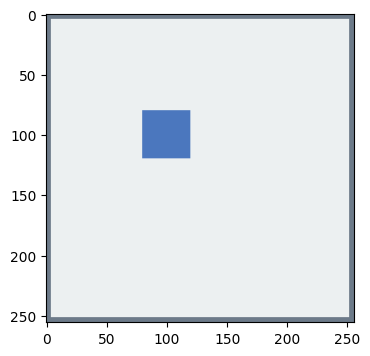

In [19]:
import matplotlib.pyplot as plt

envs = PWEnv(use_jit=False, device="cuda", num_envs=4)
envs.is_vector_env = True
envs = gym.wrappers.RecordEpisodeStatistics(envs)

envs.reset()

imgs = envs.render(mode="rgb_array")
fig = plt.figure(figsize=(4,4))
axarr = fig.subplots(1, 1)
axarr.imshow(imgs)
plt.imshow(imgs)
del imgs
plt.show()